## <span style='color: lightcoral;'>과제 제출 요령 </span>

- 1) 이 파일의 이름 `CompProb2`를 `CompProb2_자기학번`형태로 수정하고(파일 이름에 마우스 대고 오른쪽을 누르면 파일명을 수정할 수 있음) 

- 2) 코드 작성을 마친 후 반드시 `File`탭에서 `Save Notebook`을 눌러 저장한 후, 

- 3) `File`탭에서 `Close and Shut Down Notebook`을 눌러 정상적으로 종료한 다음 창을 닫고

- 4) 이 노트북 파일을 과제제출을 통해 제출하면 됩니다. (기한 엄수)

In [5]:
# 이 코드를 실행시키시오. 

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

## <span style='color: blue'>문제 2 (25점)</span>

입력 인수에 따라 그림 조건에 맞추어 아래와 같은 RGB 그림들을 생성하고 (n,n,3)형태의 numpy.ndarray로 반환하는 함수 `draw_fig`를 작성하시오. 

<img src="./flag.png" alt="image" style="width:150px;height:auto;"> <img src="./flag2.png" alt="image" style="width:150px;height:auto;"> <img src="./flag3.png" alt="image" style="width:150px;height:auto;"> <img src="./flag4.png" alt="image" style="width:150px;height:auto;"> <img src="./flag5.png" alt="image" style="width:150px;height:auto;">

- 사용법: `draw_fig(size,background, fineline, thickline, bp,sp,bc,sc)`

- 입력인수: 
>- `size`: 그림의 width=height 크기 (2n 꼴의 정수 입력)  
>- `background`: 위 첫 번째 그림의 파란색에 대응되는 (3,) shape의 리스트 (기본값 [0.1, 0.1, 0.6]으로 설정)   
>- `fineline`: 위 첫 번째 그림의 빨간색에 대응되는 (3,) shape의 리스트 (기본값 [1.0, 0.0, 0.0]으로 설정)  
>- `thickline`: 위 첫 번째 그림의 흰색에 대응되는 (3,) shape의 리스트 (기본값 [1.0, 1.0, 1.0]으로 설정)
>- `bp`: 위 두 번째 그림의 굵은 +를 그릴지 결정하는 bool값 
>- `sp`: 위 세 번째 그림의 가는 +를 그릴지 결정하는 bool값 
>- `bc`: 위 네 번째 그림의 굵은 x를 그릴지 결정하는 bool값 
>- `sc`: 위 다섯 번째 그림의 가는 x를 그릴지 결정하는 bool값 


- 그림 조건:  
>- 그림 중심에 대해 상하, 좌우 대칭
>- 전체 크기는 size x size  
>- 가는 x모양 막대에 대해 그림 윗 경계변과 겹치는 부분 길이: `flen = 3*size//70`
>- 가는 x모양 막대에 대해 그림 왼쪽 경계변과 겹치는 부분 길이: `flen = 3*size//70`
>- 가는 +모양 막대의 굵기: `2*flen`
>- 굵은 x모양 막대에 대해 그림 윗 경계변과 겹치는 부분 길이: `tlen = size//14`
>- 굵은 x모양 막대에 대해 그림 왼쪽 경계변과 겹치는 부분 길이: `tlen = size//14`
>- 가는 +모양 막대의 굵기: `2*tlen`

- `np.flip`은 입력으로 주어진 배열을 정한 axis에 대해 뒤집는 함수입니다. 이 함수를 잘 이용하면 좀 더 쉽게 문제를 해결할 수 있습니다. 
>- `np.eye(5,5,1)`,`np.flip(np.eye(5,5,1),axis=1)`,`np.flip(np.eye(5,5,0),axis=1)`을 차례로 실행시키면서 그 작용을 확인하세요. 

## <span style='color: orange'>평가요소 </span>

- numpy.ndarray의 indexing, slicing을 이용하여 값 바꿀 수 있는지 평가

- 3차원 배열 (w,h,3)의 reshape를 활용하여 2차원 배열 (w*h, 3)으로 바꾸고, bool 배열을 이용한 indexing을 통해 색을 손쉽게 바꿀 수 있는지 평가

In [9]:
# 여기에 코드를 작성하시오. 

def draw_fig(size, background=[0.1, 0.1, 0.6], fineline=[1., 0., 0.], thickline=[1., 1., 1.], bp=True, sp=True, bc=True, sc=True):
    background = np.array(background)
    fineline = np.array(fineline)
    thickline = np.array(thickline)
    
    flen = 3 * size // 70
    tlen = size // 14
    
    img = np.ones((size, size, 3)) * background
    
    if bp:
        img[size//2 - tlen:size//2 + tlen, :, :] = thickline
        img[:, size//2 - tlen:size//2 + tlen, :] = thickline
    
    if sp:
        img[size//2 - flen:size//2 + flen, :, :] = fineline
        img[:, size//2 - flen:size//2 + flen, :] = fineline
    
    if sc:
        img += np.eye(size, k=-flen)[:, :, None] * (fineline - background)
        img += np.eye(size, k=flen)[:, :, None] * (fineline - background)
        img += np.flip(np.eye(size, k=-flen), axis=1)[:, :, None] * (fineline - background)
        img += np.flip(np.eye(size, k=flen), axis=1)[:, :, None] * (fineline - background)

    if bc:
        for i in range(-tlen, tlen + 1):
            img += np.eye(size, k=i)[:, :, None] * (thickline - background)
            img += np.flip(np.eye(size, k=i), axis=1)[:, :, None] * (thickline - background)
    
    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


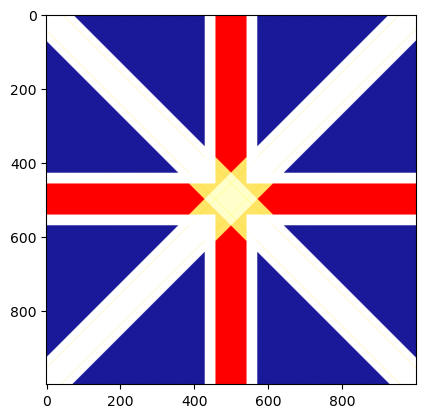

In [10]:
# 결과를 확인하기 위해 아래를 실행시키시오. 

plt.imshow(draw_fig(1000,bp=1,sp=1,bc=1,sc=1),cmap='brg')